In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, SGDRegressor, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"
!ls "/content/drive/My Drive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Classroom  'Colab Notebooks'   Videos	 Папка	 проекти
'Copy of featuretools.ipynb'
'Copy of Trees.ipynb'
'Copy of Untitled1 (1).ipynb'
'Copy of Untitled1.ipynb'
 crx.data
 data.csv
 glass.csv
 Homework_1.ipynb
 Homework4.ipynb
 Homework5.ipynb
 HW11.ipynb
 hw5_vasiliev.ipynb
 HW7.ipynb
 HW9.ipynb
'hw_pandas (1).ipynb'
 hw_pandas.ipynb
'player_data (1).csv'
 player_data.csv
'Players (1).csv'
 Players.csv
'Seasons_Stats (1).csv'
 Seasons_Stats.csv
 T10Y2Y.csv
'topic2_practice_visual_titanic_solution (1).ipynb'
 topic2_practice_visual_titanic_solution.ipynb
 TreeHomework.ipynb
 Untitled0.ipynb
 Untitled2.ipynb
 winequality-red.csv
 winequality-white.csv


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/glass.csv', names=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type_of_glass'], sep=",")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type_of_glass
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Checking for duplicates:

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             213 non-null    float64
 1   Na             213 non-null    float64
 2   Mg             213 non-null    float64
 3   Al             213 non-null    float64
 4   Si             213 non-null    float64
 5   K              213 non-null    float64
 6   Ca             213 non-null    float64
 7   Ba             213 non-null    float64
 8   Fe             213 non-null    float64
 9   type_of_glass  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type_of_glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Visual exploration

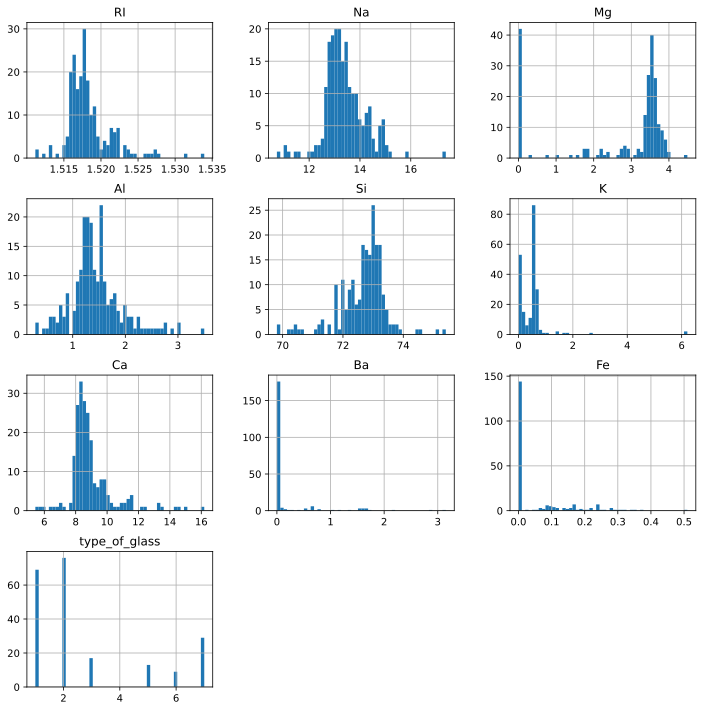

In [ ]:
df.hist(bins=50, figsize=(12, 12))
plt.show()

Type of glass можно рассматривать как категориальное.
Также мы видим что данный класс не сбалансированный
посколькуна графике видно что миноритарный класс это тип стекла 6 -tableware и мажоритарный 2 -  building_windows_non_float_processed.


In [ ]:
feats = [ 'type_of_glass', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [ ]:
sns.pairplot(df[feats])

In [ ]:
df[feats].corr()

,type_of_glass,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
type_of_glass,1.000000,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090
RI,-0.160140,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083
Na,0.508837,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374
Mg,-0.744195,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426
Al,0.597432,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583
Si,0.147725,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717
K,-0.012455,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372
Ca,0.002677,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314
Ba,0.574896,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729
Fe,-0.191090,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000


Ca коррелирует  с RI =0.8
 Si c RI = -0.5 поэтому можно попробовать сделать
 две новых фичи соеденив корреляционные друг с другом


In [ ]:
new_fich = df.copy()

In [ ]:
new_fich['ca_ri'] = new_fich['RI']/new_fich['Ca']
new_fich['ca_ri']

1      0.173830
2      0.193820
3      0.194882
4      0.184630
5      0.188032
         ...   
210    0.165167
211    0.180577
212    0.180172
213    0.178834
214    0.175999
Name: ca_ri, Length: 214, dtype: float64

In [ ]:
new_fich['si_ri'] = new_fich['RI']/new_fich['Si']
new_fich['si_ri']

1      0.021190
2      0.020866
3      0.020772
4      0.020902
5      0.020764
         ...   
210    0.020882
211    0.020762
212    0.020712
213    0.020602
214    0.020680
Name: si_ri, Length: 214, dtype: float64

In [ ]:
df.corr()['type_of_glass'].sort_values(ascending=False)

type_of_glass    1.000000
Al               0.597432
Ba               0.574896
Na               0.508837
Si               0.147725
Ca               0.002677
K               -0.012455
RI              -0.160140
Fe              -0.191090
Mg              -0.744195
Name: type_of_glass, dtype: float64

In [ ]:
new_fich.corr()['type_of_glass'].sort_values(ascending=False)

type_of_glass    1.000000
Al               0.597432
Ba               0.574896
Na               0.508837
Si               0.147725
ca_ri            0.038618
Ca               0.002677
K               -0.012455
si_ri           -0.153655
RI              -0.160140
Fe              -0.191090
Mg              -0.744195
Name: type_of_glass, dtype: float64

## Creating train and test sets

Хочу посмотреть как будет вести себя модель на несдалансированном классе, потм сбалансировать его и посмотреть опять в чем будет разница буду использовать линейную регрессию  

In [ ]:
train, test = train_test_split(new_fich, test_size=0.2)


In [ ]:
class FeatureCombiner(BaseEstimator, TransformerMixin):
    def __init__(self, add_ca_ri_ratio=True, add_si_ri_ratio=True):
        self.add_ca_ri_ratio = add_ca_ri_ratio,
        self.add_si_ri_ratio = add_si_ri_ratio

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.add_ca_ri_ratio:
            ca_per_ri = X[:, 0] / X[:, 6]
            return np.c_[X, ca_per_ri]
        elif self.add_si_ri_ratio:
            ca_per_ri = X[:, 0] / X[:, 4]
            return np.c_[X, ca_per_ri]
        else:
            return X

In [ ]:
def pipe(model):
    return Pipeline([
    ('feat_adder', FeatureCombiner()),
    ('std_scaler', StandardScaler()),
    ('model', model)
])

In [ ]:
linreg_pipe = pipe(LinearRegression())

In [ ]:
X_train = train.drop('type_of_glass', axis=1).values
y_train = train.type_of_glass.copy().values
X_test = test.drop('type_of_glass', axis=1).values
y_test = test.type_of_glass.copy().values

In [ ]:
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('feat_adder', FeatureCombiner(add_ca_ri_ratio=(True,))),
                ('std_scaler', StandardScaler()),
                ('model', LinearRegression())])

In [ ]:
linreg_pipe.score(X_train, y_train)

0.7536198448059107

видим что несбалансированный класс дал скор = 0,76
Теперь попробуем сбалансировать его разнымими методами, обучить и посмотреть где скоре будет лучше

In [ ]:
train, test = train_test_split(new_fich, test_size=0.2)
X_train = train.drop('type_of_glass', axis=1).values
y_train = train.type_of_glass.copy().values
X_test = test.drop('type_of_glass', axis=1).values
y_test = test.type_of_glass.copy().values

In [ ]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_resampled).items()))

[(1, 52), (2, 62), (3, 13), (5, 12), (6, 6), (7, 25)]
[(1, 62), (2, 62), (3, 62), (5, 62), (6, 62), (7, 62)]


In [ ]:
linreg_pipe.fit(X_resampled, y_resampled)

Pipeline(steps=[('feat_adder', FeatureCombiner(add_ca_ri_ratio=(True,))),
                ('std_scaler', StandardScaler()),
                ('model', LinearRegression())])

In [ ]:
linreg_pipe.score(X_resampled, y_resampled)

0.7210974572140709

In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[(1, 6), (2, 6), (3, 6), (5, 6), (6, 6), (7, 6)]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
linreg_pipe.fit(X_resampled, y_resampled)

Pipeline(steps=[('feat_adder', FeatureCombiner(add_ca_ri_ratio=(True,))),
                ('std_scaler', StandardScaler()),
                ('model', LinearRegression())])

In [ ]:
linreg_pipe.score(X_resampled, y_resampled)

0.6950193278644534

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(1, 35), (2, 28), (3, 44), (5, 61), (6, 61), (7, 53)]


In [ ]:
linreg_pipe.fit(X_resampled, y_resampled)

Pipeline(steps=[('feat_adder', FeatureCombiner(add_ca_ri_ratio=(True,))),
                ('std_scaler', StandardScaler()),
                ('model', LinearRegression())])

In [ ]:
linreg_pipe.score(X_resampled, y_resampled)

0.8537143927052959

In [ ]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(1, 61), (2, 60), (3, 61), (5, 62), (6, 62), (7, 62)]


In [ ]:
linreg_pipe.fit(X_resampled, y_resampled)

Pipeline(steps=[('feat_adder', FeatureCombiner(add_ca_ri_ratio=(True,))),
                ('std_scaler', StandardScaler()),
                ('model', LinearRegression())])

In [ ]:
linreg_pipe.score(X_resampled, y_resampled)

0.7592679041097136

Исходя из скора, мы видим, что лучше всех на данном датасете сработал SMOTEENN score = 0.85.

попробуем не линейную регресию, а например дерево решений DecisionTreeClassifier


In [ ]:
train, test = train_test_split(new_fich, test_size=0.2)
X_train = train.drop('type_of_glass', axis=1).values
y_train = train.type_of_glass.copy().values
X_test = test.drop('type_of_glass', axis=1).values
y_test = test.type_of_glass.copy().values
X_train

array([[ 1.52065   , 14.36      ,  0.        , ...,  0.        ,
         0.1801718 ,  0.02071166],
       [ 1.51808   , 13.43      ,  2.87      , ...,  0.        ,
         0.16811517,  0.0208413 ],
       [ 1.51605   , 12.9       ,  3.44      , ...,  0.        ,
         0.18331923,  0.02075075],
       ...,
       [ 1.5166    , 12.99      ,  3.18      , ...,  0.24      ,
         0.17214529,  0.02078388],
       [ 1.5161    , 13.42      ,  3.4       , ...,  0.        ,
         0.18222356,  0.02085706],
       [ 1.51783   , 12.69      ,  3.54      , ...,  0.        ,
         0.17346629,  0.02080644]])

In [ ]:
linreg_pipe = pipe(DecisionTreeClassifier(max_depth=2, random_state=0))

In [ ]:
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('feat_adder', FeatureCombiner(add_ca_ri_ratio=(True,))),
                ('std_scaler', StandardScaler()),
                ('model', DecisionTreeClassifier(max_depth=2, random_state=0))])

In [ ]:
ypred = linreg_pipe.predict(X_test)
ypred

array([1, 1, 1, 1, 1, 1, 6, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 1,
       6, 1, 6, 1, 6, 1, 1, 1, 1, 1, 7, 1, 7, 1, 6, 1, 1, 1, 1, 1, 7])

In [ ]:
accuracy_score(ypred, y_test)

0.4186046511627907

данная модель дала хуже результат, чем линеная регрессия даже если сравнивать с моделью обученой на несбалансированных данных
Поробуем что даст балансировка

In [ ]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(1, 53), (2, 56), (3, 56), (5, 61), (6, 61), (7, 61)]


In [ ]:
linreg_pipe.fit(X_resampled, y_resampled)

Pipeline(steps=[('feat_adder', FeatureCombiner(add_ca_ri_ratio=(True,))),
                ('std_scaler', StandardScaler()),
                ('model', DecisionTreeClassifier(max_depth=2, random_state=0))])

In [ ]:
ypred = linreg_pipe.predict(X_test)
ypred

array([5, 5, 5, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 7, 5,
       7, 5, 6, 5, 6, 5, 5, 5, 5, 5, 7, 5, 7, 5, 7, 5, 5, 5, 5, 5, 7])

In [ ]:
accuracy_score(ypred, y_test)

0.20930232558139536

In [ ]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_resampled).items()))

[(1, 56), (2, 61), (3, 14), (5, 11), (6, 7), (7, 22)]
[(1, 61), (2, 61), (3, 61), (5, 61), (6, 61), (7, 61)]


In [ ]:
linreg_pipe.fit(X_resampled, y_resampled)

Pipeline(steps=[('feat_adder', FeatureCombiner(add_ca_ri_ratio=(True,))),
                ('std_scaler', StandardScaler()),
                ('model', DecisionTreeClassifier(max_depth=2, random_state=0))])

In [ ]:
ypred = linreg_pipe.predict(X_test)
ypred

array([1, 1, 1, 5, 1, 1, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 5, 7, 1,
       7, 5, 5, 1, 5, 1, 1, 1, 1, 1, 7, 1, 7, 1, 7, 1, 5, 1, 1, 1, 7])

In [ ]:
accuracy_score(ypred, y_test)

0.46511627906976744

In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[(1, 7), (2, 7), (3, 7), (5, 7), (6, 7), (7, 7)]


In [ ]:
linreg_pipe.fit(X_resampled, y_resampled)

Pipeline(steps=[('feat_adder', FeatureCombiner(add_ca_ri_ratio=(True,))),
                ('std_scaler', StandardScaler()),
                ('model', DecisionTreeClassifier(max_depth=2, random_state=0))])

In [ ]:
ypred = linreg_pipe.predict(X_test)
ypred

array([1, 1, 1, 1, 1, 1, 6, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 1,
       6, 1, 6, 1, 6, 1, 1, 1, 1, 1, 7, 1, 7, 1, 6, 1, 1, 1, 1, 1, 7])

In [ ]:
accuracy_score(ypred, y_test)

0.4186046511627907

лучше из двух можелей сработала линейная регрессия с балансировкой с помощью SMOTEENN дала скоре 0,85